In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('singapore-airbnb/listings.csv')
df.isna().sum()

id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                     0
dtype: int64

### Initial Data Exploration

#### Variable: Price

/Users/sharondodda/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


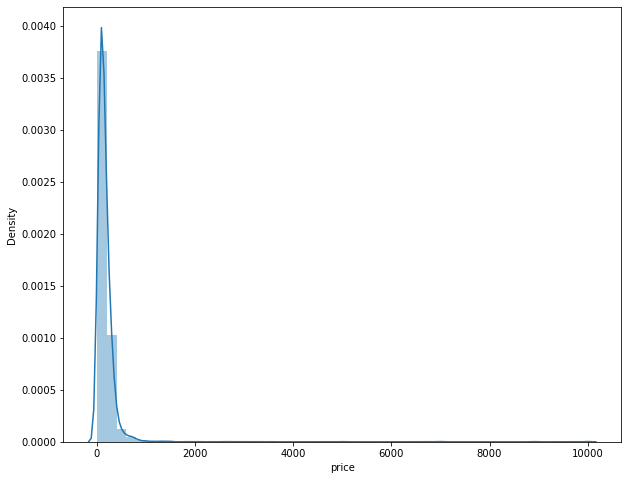

In [16]:
plt.figure(figsize=(10,8))  
sns.distplot(df.price)

plt.show()

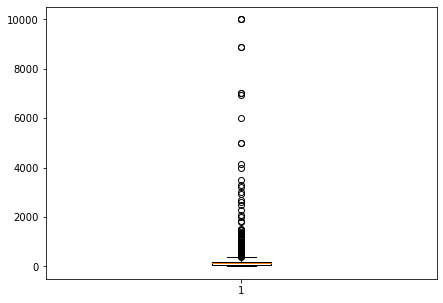

In [15]:
fig = plt.figure(figsize =(7, 5))
plt.boxplot(df['price'])

plt.show()

#### Variable: Room Type

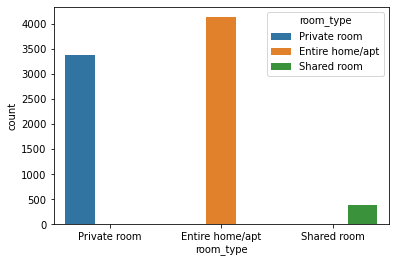

In [17]:
sns.countplot(x = df["room_type"], hue = df["room_type"])
plt.show()

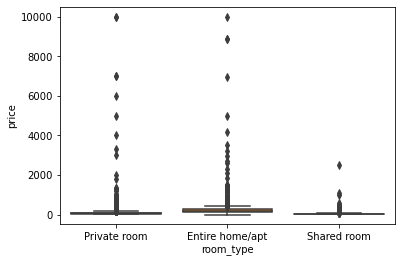

In [21]:
sns.boxplot(y="price", x='room_type', data=df)
plt.show()

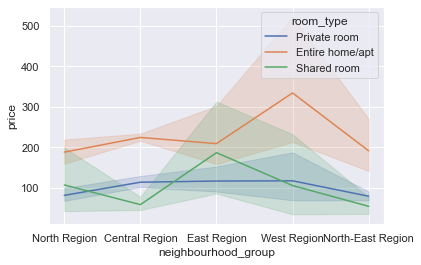

In [24]:
sns.set(style="darkgrid")

sns.lineplot(x="neighbourhood_group", y="price",
             hue="room_type",
             data=df)

plt.show()

#### Variable: Neighbourhood Group

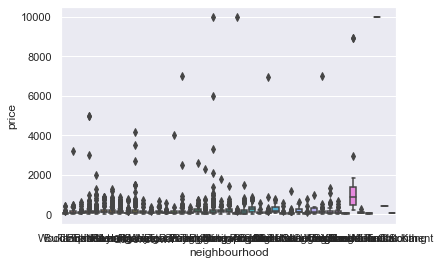

In [28]:
sns.boxplot(y="price", x ='neighbourhood', data=df)
plt.show()

After some data cleaning:

In [27]:
df_cleaned = pd.read_csv('cleaned.csv')
df_cleaned.isna().sum()

id                     0
name                   2
neighbourhood_group    0
neighbourhood          0
latitude               0
longitude              0
room_type              0
price                  0
dtype: int64

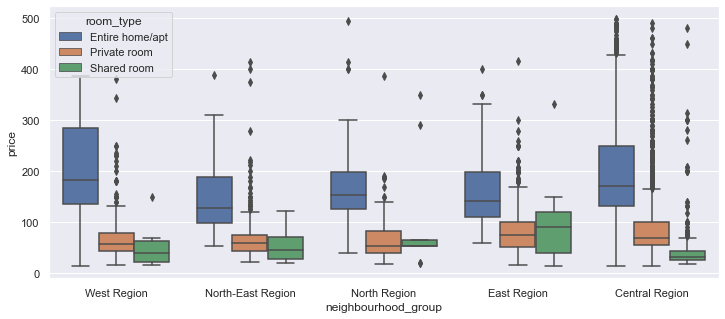

In [34]:
fig = plt.figure(figsize =(12, 5))

ng = df_cleaned[df_cleaned.price < 500]
sns.boxplot(y="price", x ='neighbourhood_group', hue='room_type', data=ng)
plt.show()

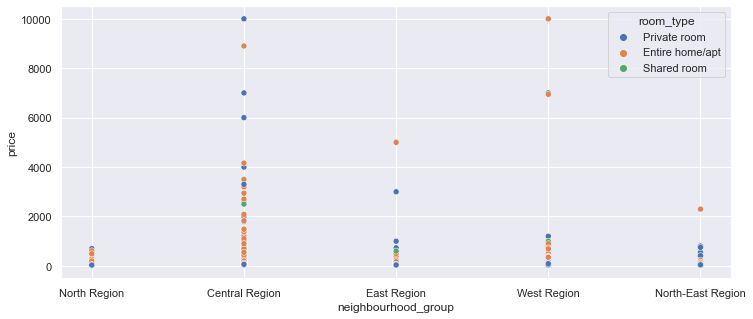

In [37]:
fig = plt.figure(figsize =(12, 5))

sns.scatterplot(x='neighbourhood_group' ,y='price', hue='room_type', data=df)
plt.show()

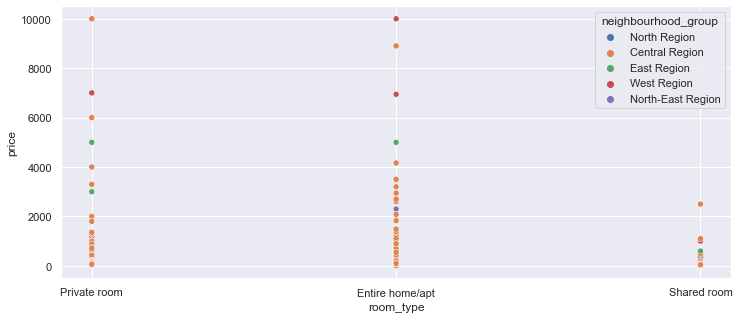

In [38]:
fig = plt.figure(figsize =(12, 5))

sns.scatterplot(x='room_type' ,y='price', hue='neighbourhood_group', data=df)
plt.show()

### Heatmap of Variables

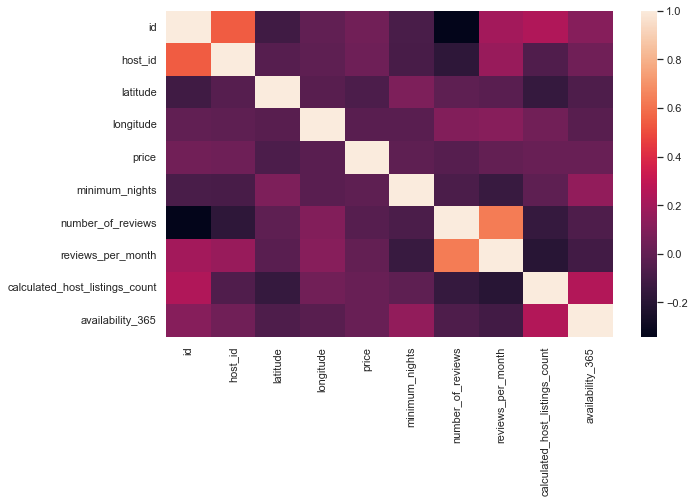

In [50]:
plt.figure(figsize=(10,6))
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

plt.show()

### Decision Tree Classifier

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
import sklearn.metrics

In [58]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [59]:
df1 = df_cleaned.copy()
#need to convert string features into float using label encoder

# Categorical boolean mask
categorical_feature_mask = df1.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = df1.columns[categorical_feature_mask].tolist()

#instantiate label encoder object
le = LabelEncoder()
df1[categorical_cols] = df1[categorical_cols].apply(lambda col: le.fit_transform(col))
df1[categorical_cols].head(10)

,name,neighbourhood_group,neighbourhood,room_type
0,3967,4,3,0
1,6388,4,3,0
2,7398,4,3,0
3,5616,4,3,0
4,5626,4,3,0
5,5566,4,3,0
6,4852,4,3,0
7,5786,4,3,0
8,4397,4,3,0
9,4843,4,3,0


In [60]:
del df1['id']
del df1['name']
df1.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price'],
      dtype='object')

In [61]:
clean_data = df1.copy()
a = (clean_data['price'] <=50) *1
b = (clean_data['price'] >50) *2
c = (clean_data['price'] >100) *1
clean_data['price_label'] = a+b+c
print (clean_data['price_label'])

0       3
1       3
2       3
3       3
4       3
       ..
7901    1
7902    3
7903    2
7904    1
7905    1
Name: price_label, Length: 7906, dtype: int64


In [62]:
y = clean_data[['price_label']].copy()
y.head()

,price_label
0,3
1,3
2,3
3,3
4,3


In [64]:
features = ['neighbourhood', 'room_type']
x = clean_data[features].copy()
x.columns

Index(['neighbourhood', 'room_type'], dtype='object')

In [66]:
#splitting into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=324)

In [67]:
price_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
price_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

In [68]:
#finding predicted values
y_predicted = price_classifier.predict(X_test)

In [71]:
accuracy_score(y_test, y_predicted)

0.7306070826306914

### Random Forest Regressor

In [72]:
df2 = df_cleaned.copy()
#need to convert string features into float using label encoder

X = df2.drop(columns = ['name'])

#need to convert string features into float using label encoder

# Categorical boolean mask
categorical_feature_mask = X.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = X.columns[categorical_feature_mask].tolist()

#instantiate label encoder object
le = LabelEncoder()
X[categorical_cols] = X[categorical_cols].apply(lambda col: le.fit_transform(col))
X[categorical_cols].head(10)

,neighbourhood_group,neighbourhood,room_type
0,4,3,0
1,4,3,0
2,4,3,0
3,4,3,0
4,4,3,0
5,4,3,0
6,4,3,0
7,4,3,0
8,4,3,0
9,4,3,0


In [73]:
del X['id']
del X['latitude']
del X['longitude']

In [74]:
X.columns

Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'price'], dtype='object')

In [75]:
features = X.drop('price', axis=1)
feature_list = list(features.columns)
features = np.array(features)

In [76]:
label = np.array(X['price'])

In [77]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2)

forest_reg = RandomForestRegressor(n_estimators=1000, random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [78]:
predictions = forest_reg.predict(X_test)
errors = abs(predictions - y_test)
print (predictions)

[163.8518623  144.25623589  77.21781255 ... 144.25623589 174.55471265
  59.02236669]


In [79]:
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 24.93 %.


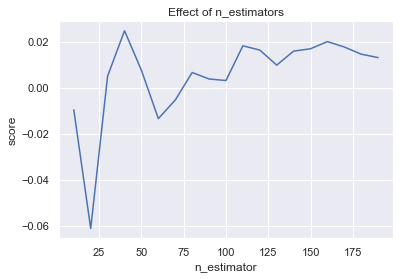

In [80]:
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    forest_reg.set_params(n_estimators=n)
    forest_reg.fit(X_train, y_train)
    scores.append(forest_reg.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)